In [1]:
import os
import numpy as np
import pandas as pd
import librosa
import parselmouth
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def extract_f0(y, sr):
    f0, voiced_flag, _ = librosa.pyin(
        y, fmin=50, fmax=400, sr=sr
    )
    return np.nanmean(f0)

def extract_formants(filepath):
    snd = parselmouth.Sound(filepath)
    formant = snd.to_formant_burg()

    f1, f2, f3 = [], [], []

    for t in np.arange(0, snd.duration, 0.01):
        f1.append(formant.get_value_at_time(1, t))
        f2.append(formant.get_value_at_time(2, t))
        f3.append(formant.get_value_at_time(3, t))

    return (
        np.nanmean(f1),
        np.nanmean(f2),
        np.nanmean(f3)
    )

In [3]:
dataset_path = "data"
data = []

for emotion in os.listdir(dataset_path):
    emotion_path = os.path.join(dataset_path, emotion)

    if not os.path.isdir(emotion_path):
        continue

    for file in os.listdir(emotion_path):
        if not file.endswith(".wav"):
            continue

        filepath = os.path.join(emotion_path, file)

        y, sr = librosa.load(filepath, sr=None)
        f0 = extract_f0(y, sr)
        f1, f2, f3 = extract_formants(filepath)

        data.append([emotion, f0, f1, f2, f3])

df = pd.DataFrame(
    data,
    columns=["Emotion", "F0", "F1", "F2", "F3"]
)

print(df.head())

  Emotion          F0           F1           F2           F3
0   Angry  167.148470  1012.242484  2073.847310  3154.271483
1   Angry  264.300682   941.833019  2055.804877  3395.905142
2   Angry  102.414501   911.611932  1997.858287  3082.075046
3   Angry  274.817627   934.635739  2000.938214  3414.864156
4   Angry  188.092944   985.935731  1949.320079  2975.538827


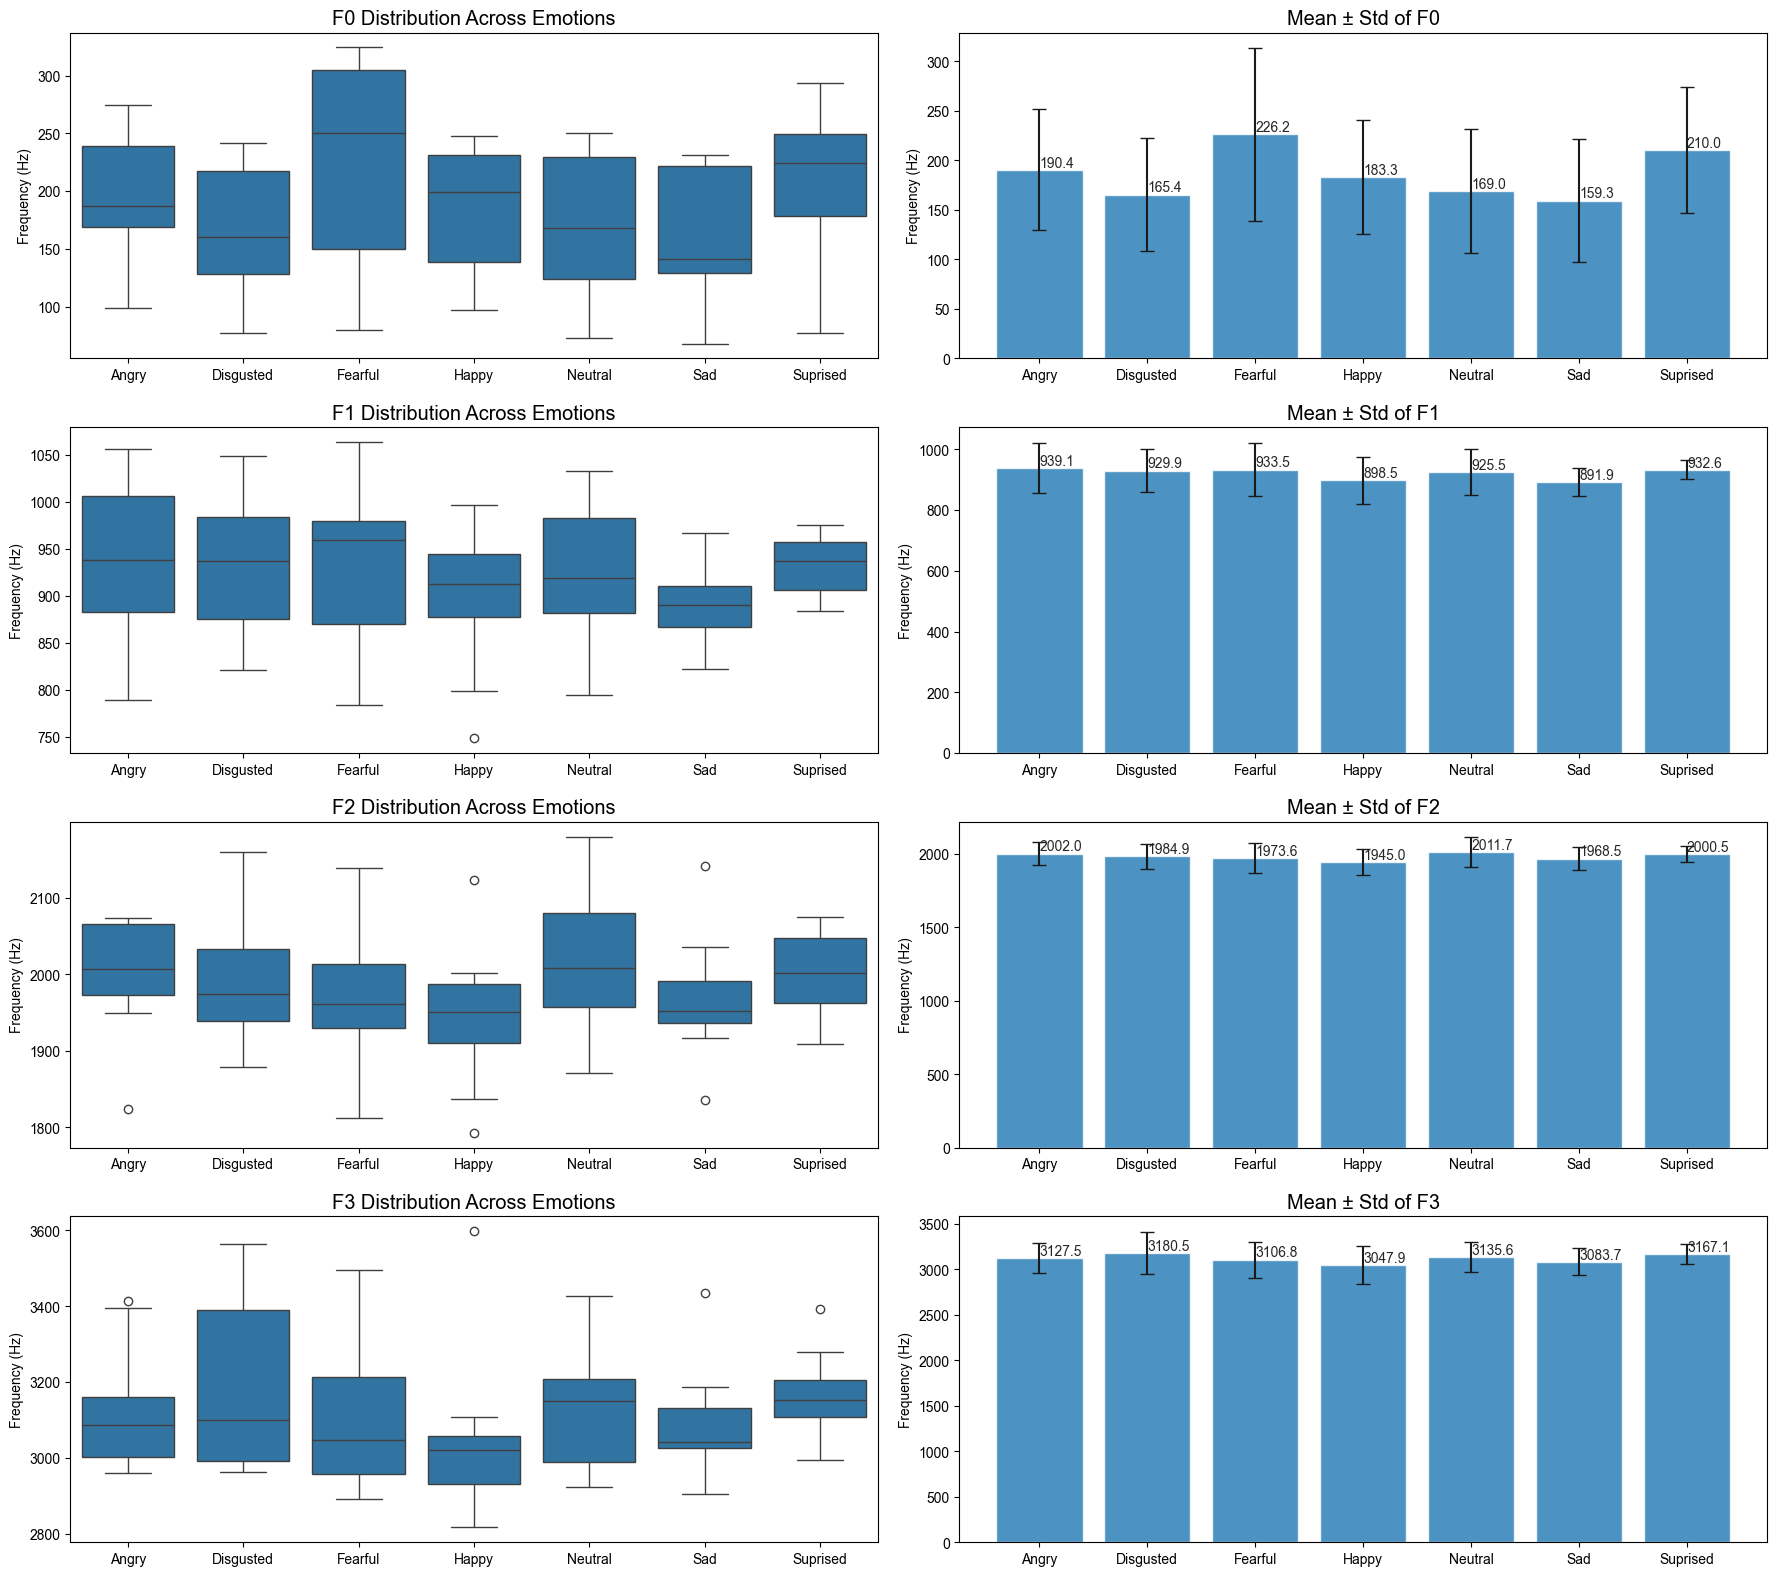

In [4]:
features = ["F0", "F1", "F2", "F3"]
stats = df.groupby("Emotion")[features].agg(["mean", "std"])

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 16), sharex=False)
sns.set_theme(style="whitegrid", font_scale=1.2)

for i, feature in enumerate(features):
    sns.boxplot(x="Emotion", y=feature, data=df, ax=axes[i, 0])
    axes[i, 0].set_title(f"{feature} Distribution Across Emotions")
    axes[i, 0].set_ylabel("Frequency (Hz)")
    axes[i, 0].set_xlabel(None)

    means = stats[feature]["mean"]
    stds = stats[feature]["std"]

    bars = axes[i, 1].bar(means.index, means.values, yerr=stds.values, capsize=5, alpha=0.8)
    axes[i, 1].set_title(f"Mean ± Std of {feature}")
    axes[i, 1].set_ylabel("Frequency (Hz)")

    for bar, mean_val in zip(bars, means):
        axes[i, 1].text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f"{mean_val:.1f}",
            ha="left",
            va="bottom",
            fontsize=10
        )

plt.tight_layout()
plt.show()

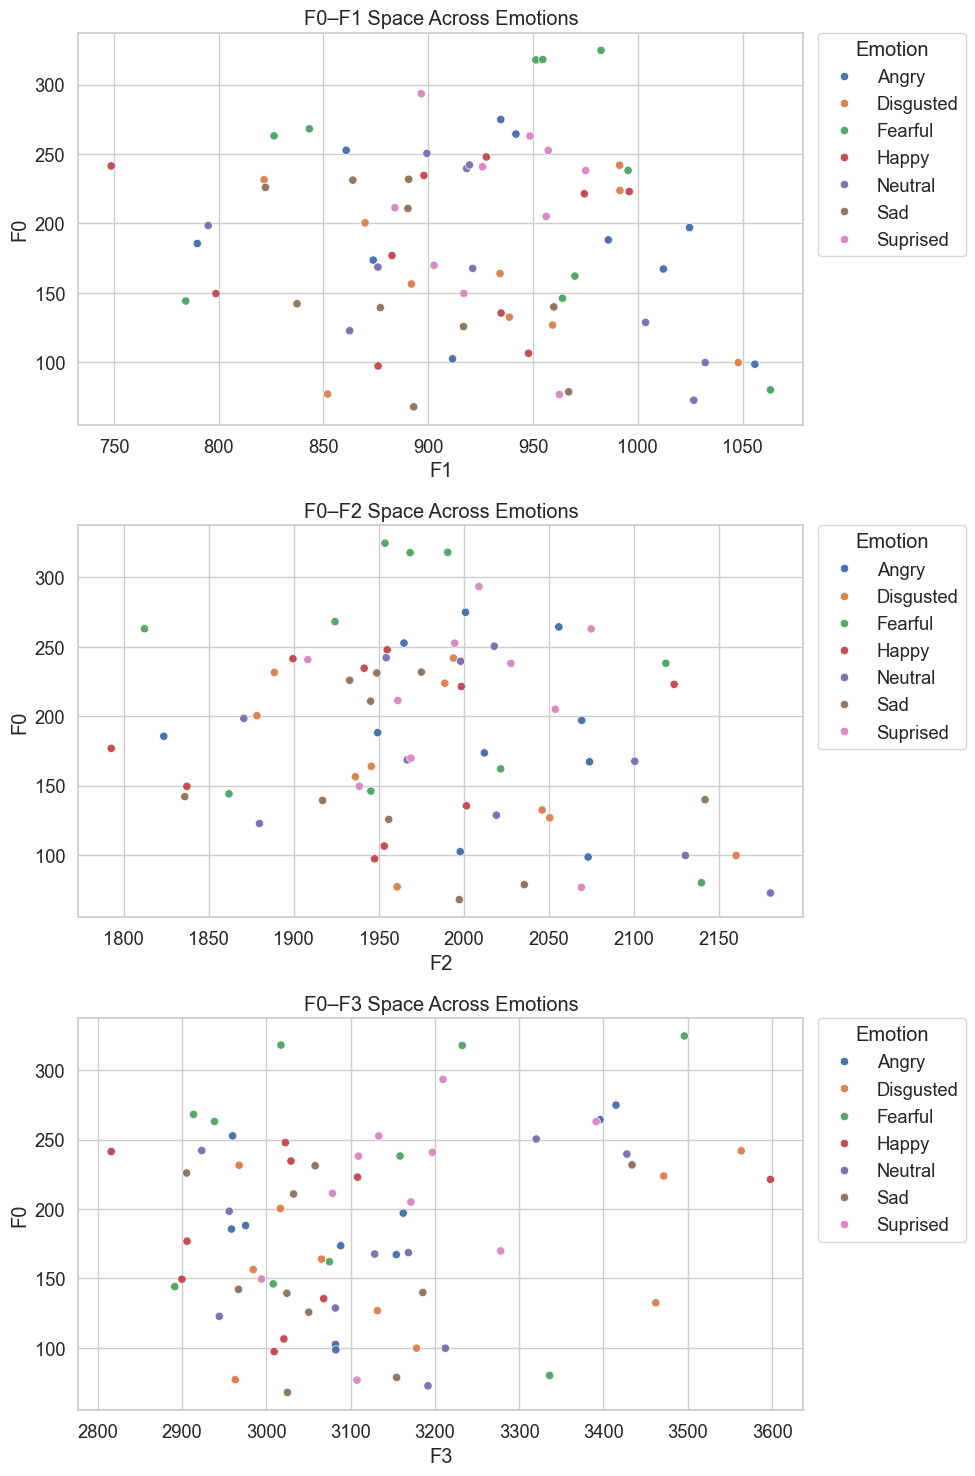

In [ ]:
plt.figure(figsize=(10, 15))

plt.subplot(3,1,1)
sns.scatterplot(data=df, x="F1", y="F0", hue="Emotion")
plt.title("F0–F1 Space Across Emotions")
plt.legend(title="Emotion", bbox_to_anchor=(1.02, 1),loc="upper left",borderaxespad=0)


plt.subplot(3,1,2)
sns.scatterplot(data=df, x="F2", y="F0", hue="Emotion")
plt.title("F0–F2 Space Across Emotions")
plt.legend(title="Emotion", bbox_to_anchor=(1.02, 1),loc="upper left",borderaxespad=0)

plt.subplot(3,1,3)
sns.scatterplot(data=df, x="F3", y="F0", hue="Emotion")
plt.title("F0–F3 Space Across Emotions")
plt.legend(title="Emotion", bbox_to_anchor=(1.02, 1),loc="upper left",borderaxespad=0)

plt.tight_layout()
plt.show()

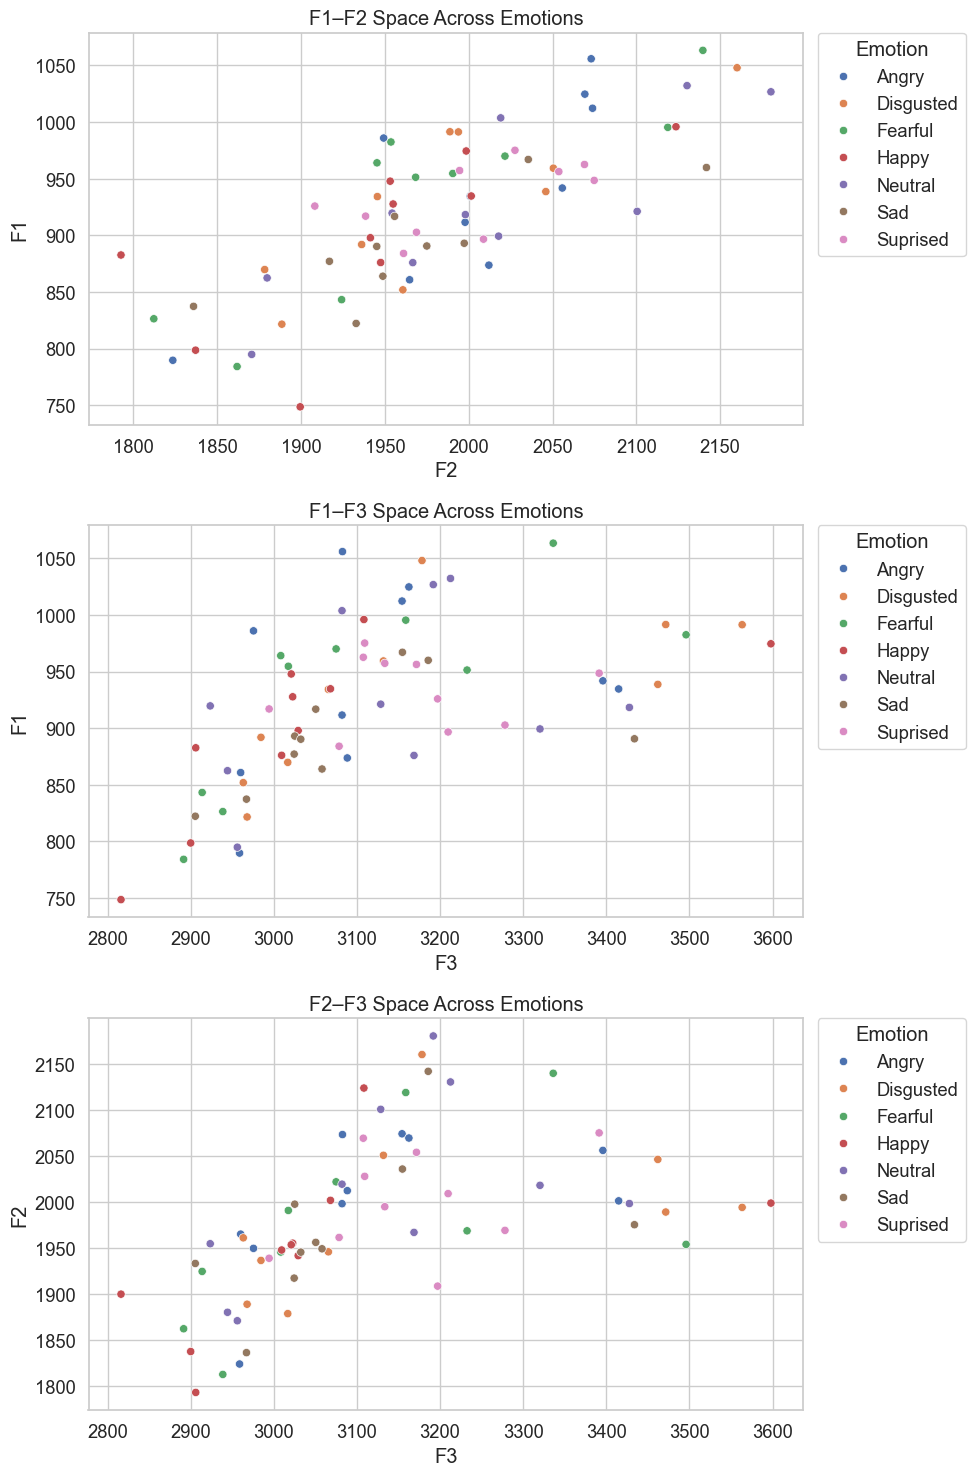

In [12]:
plt.figure(figsize=(10, 15))

plt.subplot(3,1,1)
sns.scatterplot(data=df, x="F2", y="F1", hue="Emotion")
plt.title("F1–F2 Space Across Emotions")
plt.legend(title="Emotion", bbox_to_anchor=(1.02, 1),loc="upper left",borderaxespad=0)

plt.subplot(3,1,2)
sns.scatterplot(data=df, x="F3", y="F1", hue="Emotion")
plt.title("F1–F3 Space Across Emotions")
plt.legend(title="Emotion", bbox_to_anchor=(1.02, 1),loc="upper left",borderaxespad=0)

plt.subplot(3,1,3)
sns.scatterplot(data=df, x="F3", y="F2", hue="Emotion")
plt.title("F2–F3 Space Across Emotions")
plt.legend(title="Emotion", bbox_to_anchor=(1.02, 1),loc="upper left",borderaxespad=0)

plt.tight_layout()
plt.show()